In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df = pd.read_csv("5.2-advertising.csv")

In [31]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [35]:
df.shape

(200, 4)

In [36]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [37]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


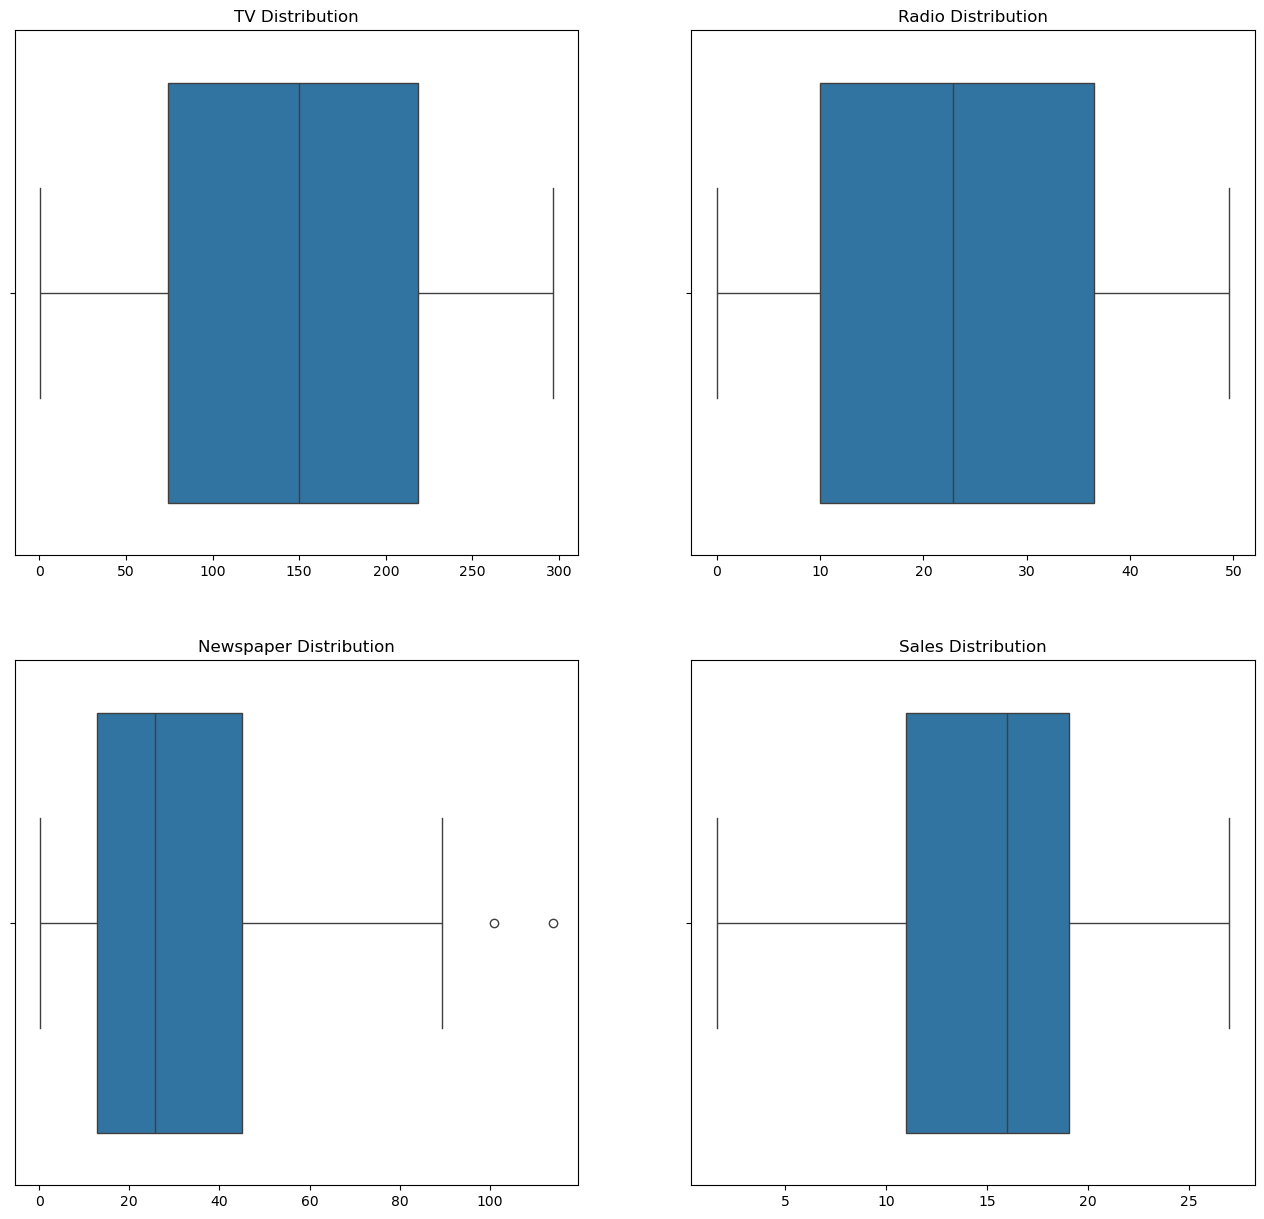

In [41]:
columns = df.columns
(fig, ax) = plt.subplots(2,2, figsize=(16,15))
ax = ax.flatten()

for i, column in enumerate(columns):
    sns.boxplot (
        data = df,
        x= column,
        ax = ax[i]  
    )

    ax[i].set_title(f"{column} Distribution")
    ax[i].set_xlabel(None)

for i in range (i + 1, len(ax)):
    ax[i].axis("off")

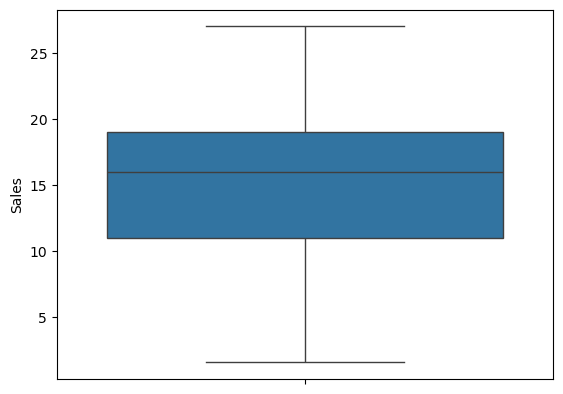

In [43]:
sns.boxplot(df["Sales"])
plt.show()

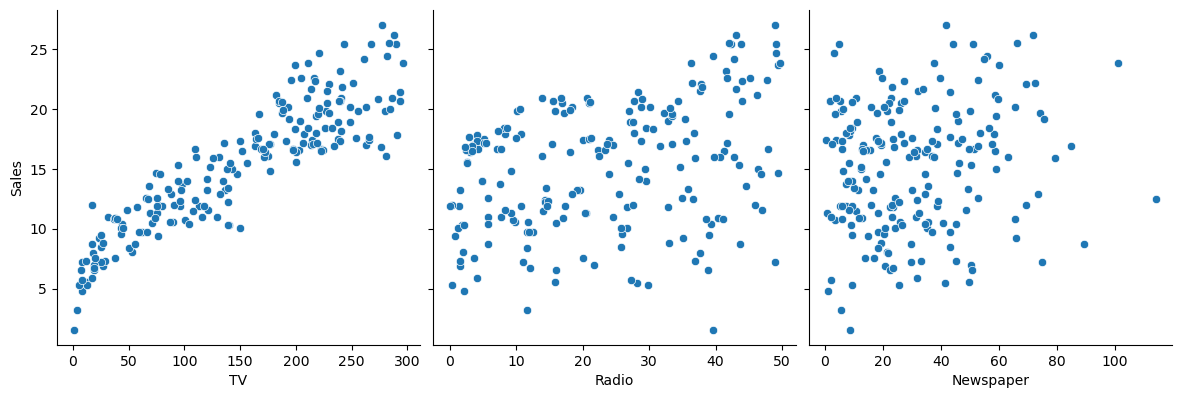

In [50]:
sns.pairplot(df, x_vars= ["TV", "Radio", "Newspaper"], y_vars= "Sales", height=4, kind="scatter")
plt.show()

In [51]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


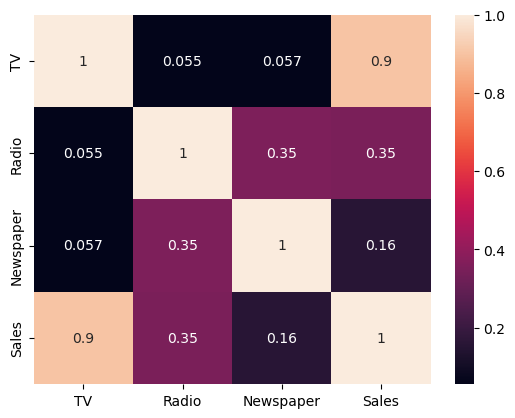

In [53]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [54]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 15)

In [61]:
X_train.head()

,TV,Radio,Newspaper
97,184.9,21.0,22.0
20,218.4,27.7,53.4
169,284.3,10.6,6.4
137,273.7,28.9,59.7
181,218.5,5.4,27.4


In [62]:
X_test.head()

,TV,Radio,Newspaper
49,66.9,11.7,36.8
191,75.5,10.8,6.0
12,23.8,35.1,65.9
172,19.6,20.1,17.0
127,80.2,0.0,9.2


In [63]:
y_test.head()

49      9.7
191    11.9
12      9.2
172     7.6
127    11.9
Name: Sales, dtype: float64

In [64]:
y_train.head()

97     20.5
20     18.0
169    20.0
137    20.8
181    17.2
Name: Sales, dtype: float64

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

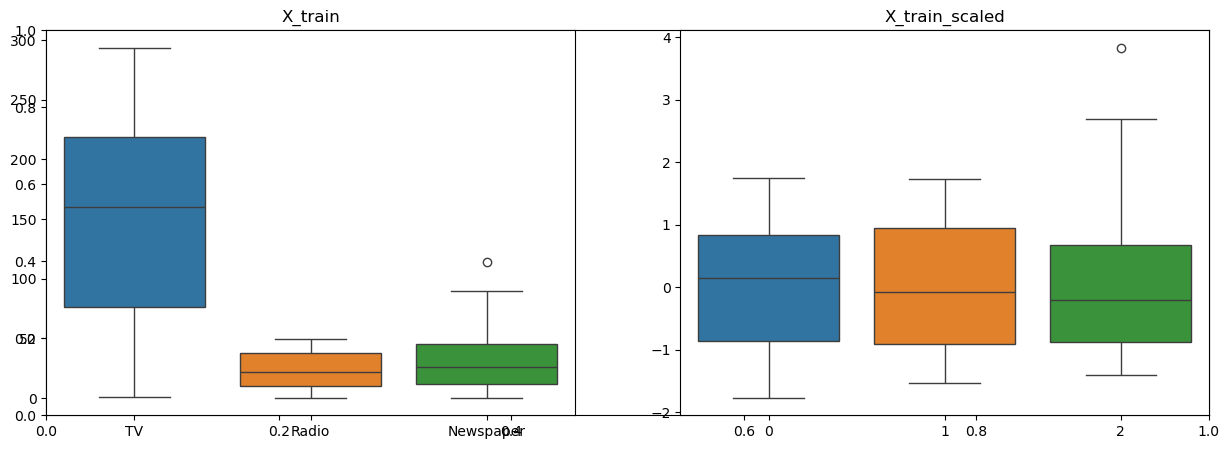

In [68]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train")

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Mean Absolute Error:  1.1973815538622266
Mean Squared Error:  2.5829172101689304
R2 Score:  0.9100343273696335


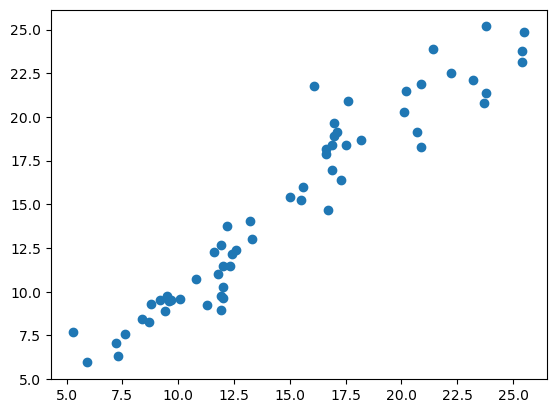

In [80]:
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)
y_pred = regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.6098405230069026
Mean Squared Error:  4.368169819391221
R2 Score:  0.8478521361745485


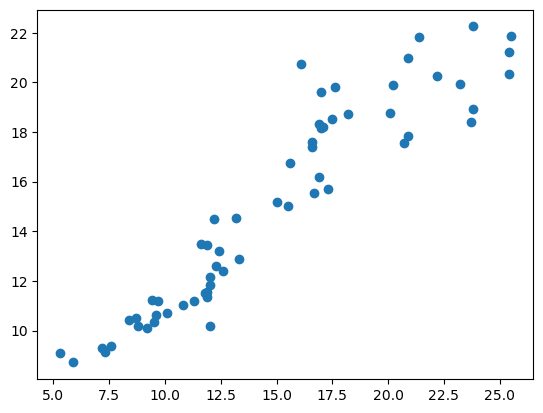

In [71]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.188422435531103
Mean Squared Error:  2.557162799885536
R2 Score:  0.9109313800646336


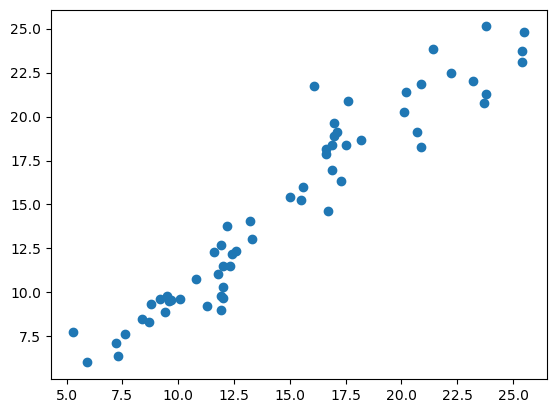

In [72]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.9700452341217223
Mean Squared Error:  6.348405619139354
R2 Score:  0.7788784791832658


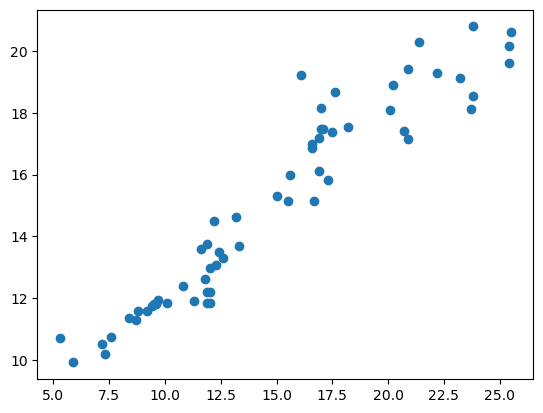

In [73]:
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

In [75]:
# cross validation
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

Mean Absolute Error:  1.178968025205218
Mean Squared Error:  2.5333071410809174
R2 Score:  0.9117622972856534


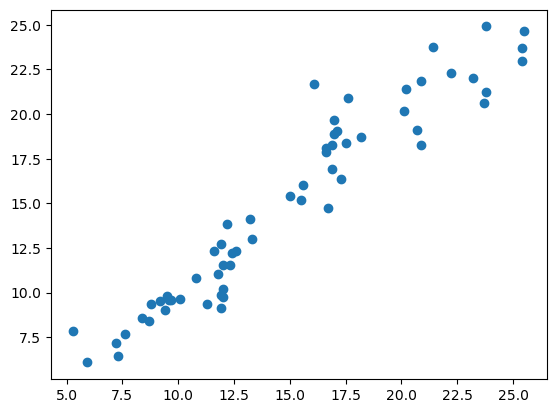

In [76]:
lassocv = LassoCV()
lassocv.fit(X_train_scaled, y_train)
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.196358271859871
Mean Squared Error:  2.580194550023684
R2 Score:  0.9101291604329413


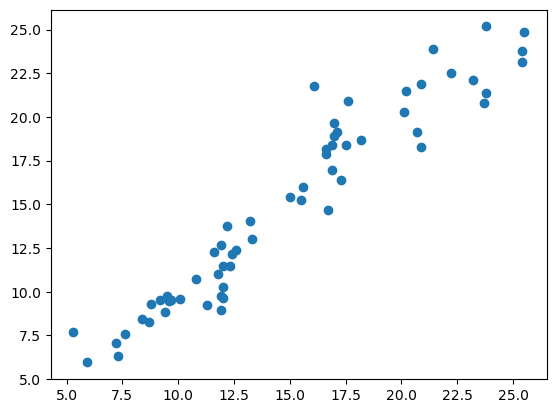

In [77]:
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error:  1.1714683537311275
Mean Squared Error:  2.5086941511481906
R2 Score:  0.9126195931316157


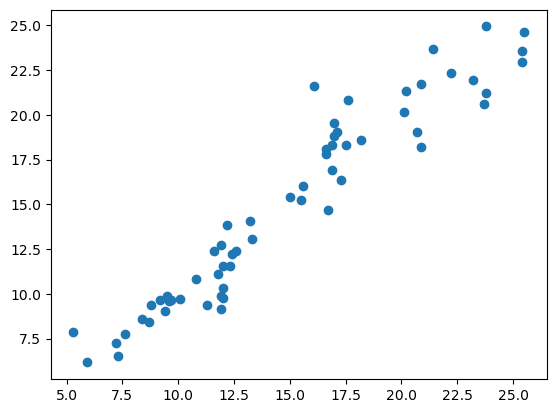

In [78]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 Score: ', score)
plt.scatter(y_test, y_pred)
plt.show()

In [83]:
y_pred.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'